In [1]:
import logging
import seaborn as sns
import matplotlib.pyplot as plt
from abcsmc.loader import ABCLoader, SQLDataStore

In [2]:
logging.getLogger('matplotlib').setLevel(logging.INFO)

In [3]:
# Configuration
db = '/gaba/u/amotta/data/klinger/fig_4a_without_true_model.db'

model_colors = {
    'ER': (29, 29, 27),
    'EXP': (105, 182, 230),
    'LL': (230, 161, 0),
    'SYN': (211, 88, 21),
    'ERFEVER': (245, 228, 45),
    'API': (0, 109, 176),
    'SORN': (0, 152, 106)
}

model_colors = {m: tuple(map(lambda c: c / 255, c))
                for m, c in model_colors.items()}

In [4]:
loader = ABCLoader(SQLDataStore(db))
particles = loader.particle_counts()
model_probs = loader.model_probs()
distances = loader.sample_distances()

<AxesSubplot:xlabel='model_name', ylabel='t'>

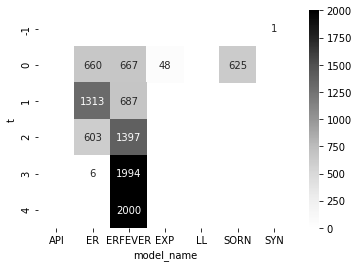

In [8]:
%matplotlib inline
sns.heatmap(particles.loc[3, :], vmin=0, vmax=2000, cmap="Greys", square=True,
            annot=True, fmt='.0f', annot_kws={'size': 10})

<AxesSubplot:xlabel='model_name', ylabel='t'>

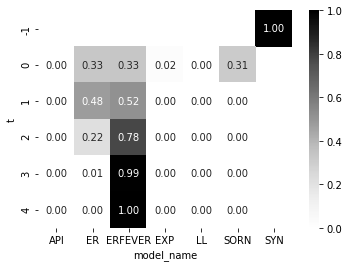

In [6]:
sns.heatmap(model_probs.loc[3, :], vmin=0, vmax=1, cmap="Greys", square=True,
            annot=True, fmt='.2f', annot_kws={'size': 10})

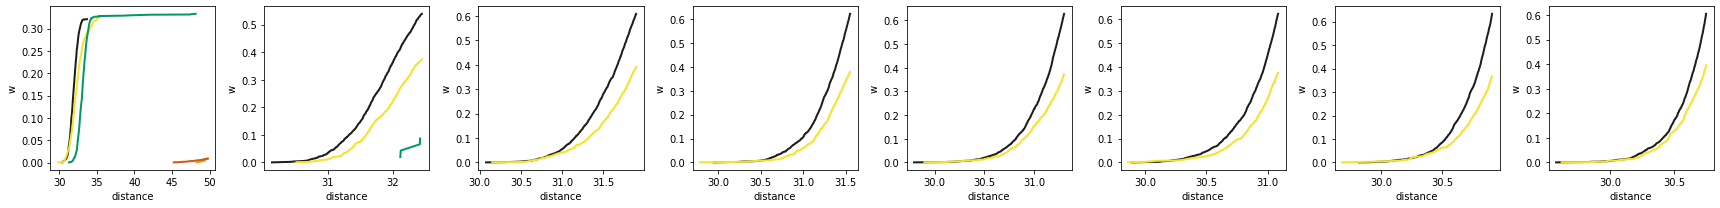

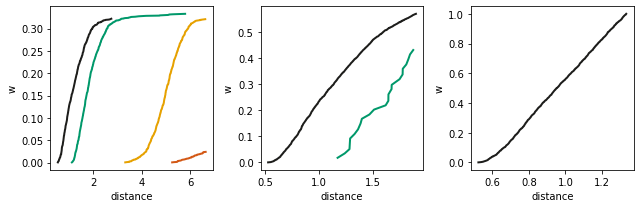

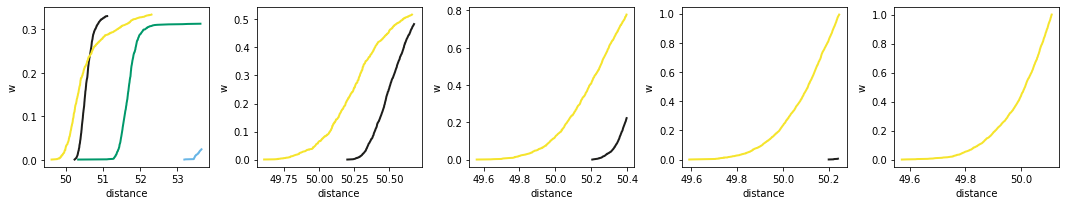

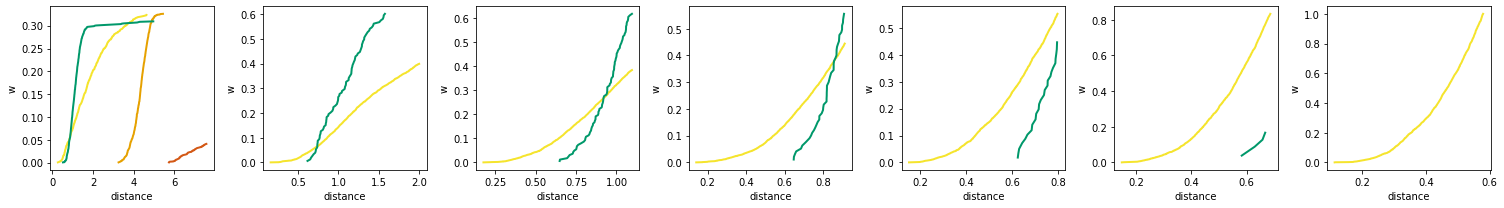

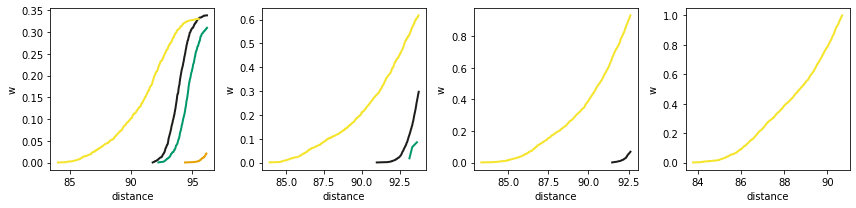

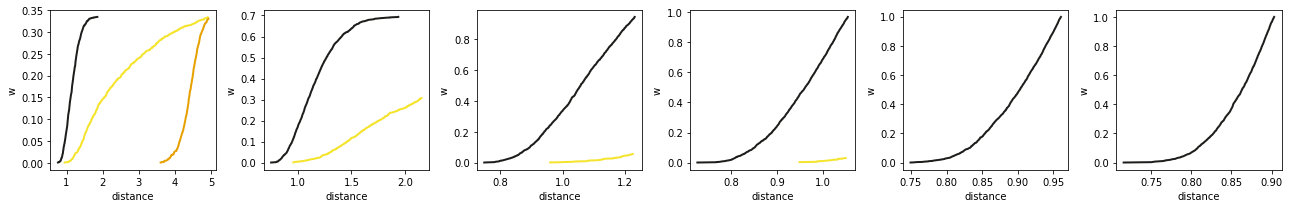

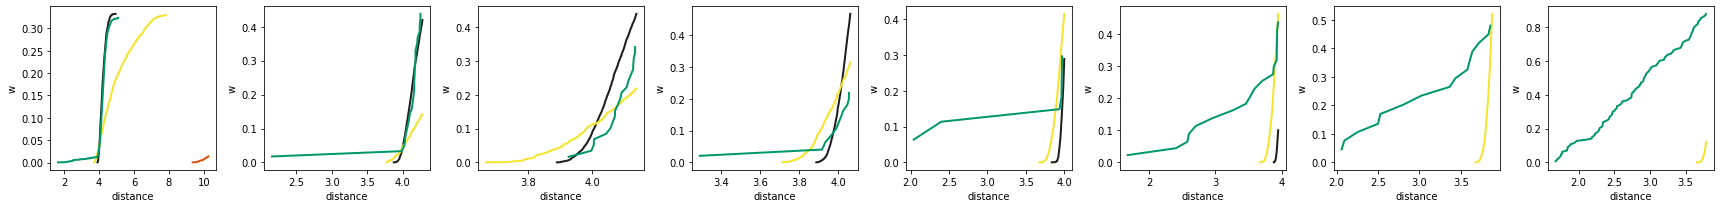

In [7]:
for abc_id in distances.index.get_level_values(0).unique():
    abc_dists = distances.loc[abc_id, :, :]
    
    generations = abc_dists.index.get_level_values(0).unique()
    generations = generations[generations >= 0]

    fig, axes = plt.subplots(1, len(generations), figsize=(3 * len(generations), 3))

    for generation, ax in zip(generations, axes):
        generation_dists = abc_dists.loc[generation]

        for model_name in generation_dists.index.unique():
            model_dists = generation_dists.loc[[model_name]]
            model_color = model_colors[model_name]
            
            model_dists = model_dists.sort_values('distance')
            model_dists.w = model_dists.w.cumsum()
            
            sns.lineplot(model_dists.distance, model_dists.w,
                         color=model_color, linewidth=2, ax=ax)

    plt.tight_layout()